# RBM Unsupervised Dimensionality Reduction 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split

from sklearn.neural_network import BernoulliRBM

from sklearn.pipeline import Pipeline
from sklearn.base import clone



## load dataset

In [2]:
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml("mnist_784", version=1)

X, y = mnist["data"], mnist["target"]

y = y.astype(int)

mnist_df = pd.DataFrame(X)
mnist_df['target'] = y


In [3]:
mnist_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [4]:
mnist_df.shape

(70000, 785)

In [5]:
sorted(mnist_df['target'].unique())

[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)]

In [6]:
mnist_df.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'target'],
      dtype='object', length=785)

In [7]:
mnist_features= mnist_df.drop('target',axis=1)
mnist_features

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
mnist_label=mnist_df['target']
mnist_label

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: target, Length: 70000, dtype: int64

In [9]:
def display_image(index):
    print("Digit", mnist_label[index])

    plt.imshow(mnist_features.loc[index].values.reshape(28,28),cmap="Greys")

Digit 4


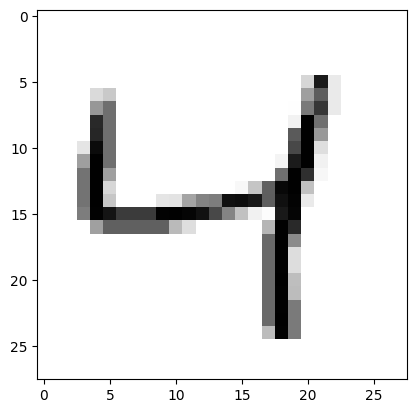

In [10]:
display_image(2)

In [11]:
mnist_features= np.array(mnist_features)
mnist_features.shape

(70000, 784)

## Tranin a Classifier on all features of the input data

In [12]:
x_train, x_test, y_train, y_test= train_test_split(mnist_features,
                                                   mnist_label,
                                                   shuffle=True,
                                                   test_size=0.2)

In [13]:
logistic= linear_model.LogisticRegression(solver='lbfgs',
                                          max_iter=1000,
                                          multi_class='multinomial')

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid= [
    {'C':[0.1,1,5]}
]

grid_search= GridSearchCV(logistic,param_grid,cv=2)
grid_search.fit(x_train,y_train)
grid_search.best_params_

/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_Solutions_with_sklearn/.venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_Solutions_with_sklearn/.venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_So

{'C': 0.1}

In [16]:
for i in range(3):
    print("Parameters: ", grid_search.cv_results_['params'][i])
    print('Mean Test Score: ', grid_search.cv_results_['mean_test_score'][i])
    print('Rank : ',grid_search.cv_results_['rank_test_score'][i] )

Parameters:  {'C': 0.1}
Mean Test Score:  0.8915178571428571
Rank :  1
Parameters:  {'C': 1}
Mean Test Score:  0.89025
Rank :  2
Parameters:  {'C': 5}
Mean Test Score:  0.8896428571428572
Rank :  3


## Dimentionality Reduction Using RBM

In [18]:
rbm= BernoulliRBM(verbose=True)

rbm_features_classifier= Pipeline(steps=[('rbm',rbm),
                                        ('logistic',logistic)
                                        ])

rbm.learning_rate=0.06
logistic.C= grid_search.best_params_['C']

In [19]:
rbm_features_classifier.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'rbm', 'logistic', 'rbm__batch_size', 'rbm__learning_rate', 'rbm__n_components', 'rbm__n_iter', 'rbm__random_state', 'rbm__verbose', 'logistic__C', 'logistic__class_weight', 'logistic__dual', 'logistic__fit_intercept', 'logistic__intercept_scaling', 'logistic__l1_ratio', 'logistic__max_iter', 'logistic__multi_class', 'logistic__n_jobs', 'logistic__penalty', 'logistic__random_state', 'logistic__solver', 'logistic__tol', 'logistic__verbose', 'logistic__warm_start'])

In [20]:
param_grid= [{'rbm__n_components':[5,50,100,150],
              'rbm__n_iter':[5,20]}]

grid_search= GridSearchCV(rbm_features_classifier,param_grid,cv=2)

grid_search.fit(x_train,y_train)

grid_search.best_params_

[BernoulliRBM] Iteration 1, pseudo-likelihood = -13166044.06, time = 1.71s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -26803087.67, time = 2.39s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -38708061.00, time = 2.14s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -50759737.82, time = 1.94s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -65003318.36, time = 2.00s


/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_Solutions_with_sklearn/.venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[BernoulliRBM] Iteration 1, pseudo-likelihood = -13229230.26, time = 1.47s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -26047266.66, time = 1.43s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -38942196.10, time = 1.41s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -52325911.89, time = 1.33s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -63842083.43, time = 1.30s


/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_Solutions_with_sklearn/.venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[BernoulliRBM] Iteration 1, pseudo-likelihood = -13135903.08, time = 1.06s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -26451566.89, time = 1.26s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -38746512.25, time = 1.28s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -51917279.98, time = 1.27s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -67020146.12, time = 1.25s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -79455005.85, time = 1.25s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -93938822.01, time = 1.27s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -105764688.77, time = 1.24s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -118014574.61, time = 1.38s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -132115019.55, time = 1.77s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -146157856.09, time = 1.75s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -159103173.92, time = 1.84s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -172187295.39, time = 1.89s
[BernoulliRBM] 

/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_Solutions_with_sklearn/.venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[BernoulliRBM] Iteration 1, pseudo-likelihood = -10883586.92, time = 1.06s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -21565688.92, time = 1.37s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -32727456.80, time = 1.78s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -44325007.56, time = 1.98s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -54149149.52, time = 1.90s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -66141534.59, time = 1.84s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -76986997.00, time = 1.78s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -86850067.76, time = 1.60s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -98294861.69, time = 1.70s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -107504710.91, time = 1.52s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -121195206.25, time = 1.49s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -131687963.00, time = 1.49s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -142515972.40, time = 1.29s
[BernoulliRBM] It

/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_Solutions_with_sklearn/.venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[BernoulliRBM] Iteration 1, pseudo-likelihood = -106709182.12, time = 2.22s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -210374473.64, time = 2.68s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -322402149.20, time = 2.67s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -425615129.58, time = 2.81s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -534373619.61, time = 2.75s


/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_Solutions_with_sklearn/.venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[BernoulliRBM] Iteration 1, pseudo-likelihood = -104522475.45, time = 2.33s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -209223478.24, time = 2.85s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -318096073.85, time = 3.14s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -412509000.10, time = 2.71s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -529608306.76, time = 3.26s


/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_Solutions_with_sklearn/.venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[BernoulliRBM] Iteration 1, pseudo-likelihood = -103622748.65, time = 2.55s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -203929818.66, time = 3.41s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -310018874.06, time = 3.53s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -411686713.79, time = 3.17s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -501283981.03, time = 3.22s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -607898849.17, time = 2.98s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -728344022.77, time = 2.61s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -809738588.63, time = 2.62s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -935916961.64, time = 4.01s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1012675937.63, time = 5.11s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -1126896767.59, time = 2.75s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -1205387675.14, time = 2.67s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -1330524043.40, time = 2.74s
[Ber

/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_Solutions_with_sklearn/.venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[BernoulliRBM] Iteration 1, pseudo-likelihood = -107556343.26, time = 2.37s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -215561289.85, time = 3.12s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -316576863.05, time = 3.06s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -426467755.53, time = 3.54s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -534084406.34, time = 3.87s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -635382297.85, time = 3.59s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -746658044.21, time = 2.76s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -858083994.66, time = 2.80s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -957862688.60, time = 2.74s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1075690642.79, time = 2.85s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -1175232368.30, time = 2.90s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -1279119124.88, time = 3.08s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -1399312839.10, time = 3.07s
[Ber

/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_Solutions_with_sklearn/.venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[BernoulliRBM] Iteration 1, pseudo-likelihood = -207457146.37, time = 4.45s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -404434688.61, time = 6.15s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -618481989.98, time = 4.99s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -824586303.30, time = 5.19s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1041237787.60, time = 3.89s


/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_Solutions_with_sklearn/.venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[BernoulliRBM] Iteration 1, pseudo-likelihood = -206911194.40, time = 3.42s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -422529465.37, time = 3.85s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -640943666.26, time = 3.90s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -853916894.87, time = 4.01s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1054675530.70, time = 3.85s


/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_Solutions_with_sklearn/.venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[BernoulliRBM] Iteration 1, pseudo-likelihood = -208384619.06, time = 4.11s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -425731147.38, time = 4.44s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -631871444.60, time = 4.07s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -836748659.14, time = 5.05s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1044577806.33, time = 5.72s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1236656273.18, time = 5.15s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -1477415152.67, time = 4.29s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -1690649661.10, time = 4.29s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -1911184541.49, time = 4.09s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -2130512050.46, time = 4.57s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -2351111099.33, time = 4.79s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -2512526339.36, time = 4.00s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -2745996937.02, time = 4.72s

/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_Solutions_with_sklearn/.venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[BernoulliRBM] Iteration 1, pseudo-likelihood = -214835639.03, time = 3.55s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -424877241.07, time = 5.41s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -646321596.03, time = 5.99s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -863911269.78, time = 4.07s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1075285438.17, time = 4.16s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1298747723.86, time = 4.76s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -1505084734.57, time = 4.34s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -1773334882.22, time = 4.55s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -1926305231.96, time = 4.67s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -2126625001.65, time = 4.42s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -2369225886.30, time = 4.64s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -2562791175.25, time = 4.81s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -2824861719.67, time = 4.86s

/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_Solutions_with_sklearn/.venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[BernoulliRBM] Iteration 1, pseudo-likelihood = -314393693.42, time = 5.34s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -630784070.00, time = 5.27s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -936568248.91, time = 6.20s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1252050037.21, time = 6.57s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1593541013.83, time = 6.61s


/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_Solutions_with_sklearn/.venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[BernoulliRBM] Iteration 1, pseudo-likelihood = -313412092.61, time = 5.06s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -639468576.50, time = 7.43s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -952847362.98, time = 5.83s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1263638457.36, time = 5.05s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1559726593.27, time = 5.51s


/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_Solutions_with_sklearn/.venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[BernoulliRBM] Iteration 1, pseudo-likelihood = -306829262.04, time = 4.38s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -612096540.95, time = 5.27s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -909545886.21, time = 5.74s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1229246772.25, time = 6.77s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1496358325.69, time = 6.49s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1858970606.58, time = 5.59s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -2129102517.90, time = 4.88s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -2435395506.08, time = 5.97s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -2812826350.47, time = 5.47s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -3143914885.51, time = 4.71s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -3387479729.21, time = 4.99s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -3683091057.19, time = 7.26s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -3956195679.30, time = 5.87

/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_Solutions_with_sklearn/.venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[BernoulliRBM] Iteration 1, pseudo-likelihood = -314331983.97, time = 4.25s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -635648401.30, time = 5.79s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -932503097.66, time = 8.40s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1256230953.48, time = 7.59s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1579432076.83, time = 5.50s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1881814443.36, time = 6.18s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -2214075455.29, time = 5.24s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -2471848941.18, time = 5.00s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -2788534185.72, time = 5.60s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -3107365245.48, time = 6.88s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -3471475813.77, time = 5.72s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -3826317460.56, time = 5.70s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -4039043937.09, time = 6.38

/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_Solutions_with_sklearn/.venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[BernoulliRBM] Iteration 1, pseudo-likelihood = -26206276.98, time = 2.49s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -52249401.14, time = 2.61s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -78113280.74, time = 2.67s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -103942203.66, time = 2.47s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -131098563.32, time = 2.69s


/run/media/agamy/46D4670CD466FD95/Project/AI/Build_ML_Solutions_with_sklearn/.venv/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


{'rbm__n_components': 5, 'rbm__n_iter': 5}

In [21]:
for i in range(8):
    print('Parameters : ', grid_search.cv_results_['params'][i])

    print('Mean Test Score : ', grid_search.cv_results_['mean_test_score'][i])

    print('Rank : :' , grid_search.cv_results_['rank_test_score'][i])

Parameters :  {'rbm__n_components': 5, 'rbm__n_iter': 5}
Mean Test Score :  0.11353571428571428
Rank : : 1
Parameters :  {'rbm__n_components': 5, 'rbm__n_iter': 20}
Mean Test Score :  0.11353571428571428
Rank : : 1
Parameters :  {'rbm__n_components': 50, 'rbm__n_iter': 5}
Mean Test Score :  0.11353571428571428
Rank : : 1
Parameters :  {'rbm__n_components': 50, 'rbm__n_iter': 20}
Mean Test Score :  0.11353571428571428
Rank : : 1
Parameters :  {'rbm__n_components': 100, 'rbm__n_iter': 5}
Mean Test Score :  0.11353571428571428
Rank : : 1
Parameters :  {'rbm__n_components': 100, 'rbm__n_iter': 20}
Mean Test Score :  0.11353571428571428
Rank : : 1
Parameters :  {'rbm__n_components': 150, 'rbm__n_iter': 5}
Mean Test Score :  0.11353571428571428
Rank : : 1
Parameters :  {'rbm__n_components': 150, 'rbm__n_iter': 20}
Mean Test Score :  0.11353571428571428
Rank : : 1
